<a href="https://colab.research.google.com/github/Varshika-5a4/FML/blob/main/Multivariate_startupdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
temp=pd.read_csv("/content/50_Startups.csv")

In [5]:
temp


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
temp.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
temp.shape

(50, 5)

In [9]:
temp.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


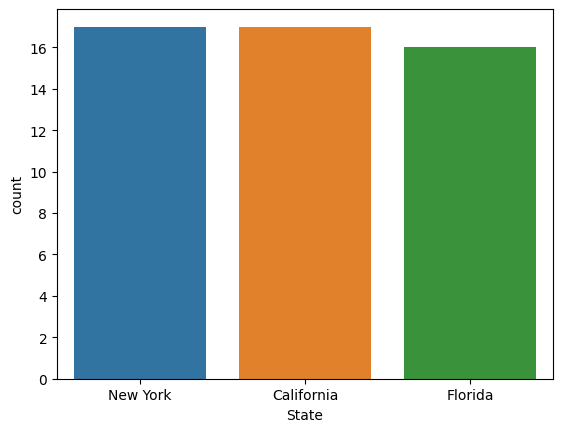

In [10]:
sns.countplot(data=temp,x=temp["State"])
plt.show()
     


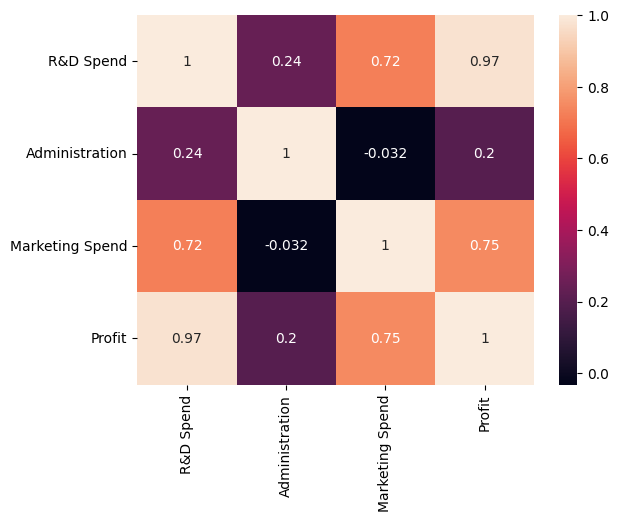

In [11]:
sns.heatmap(temp.corr(),annot=True)
plt.show()

     

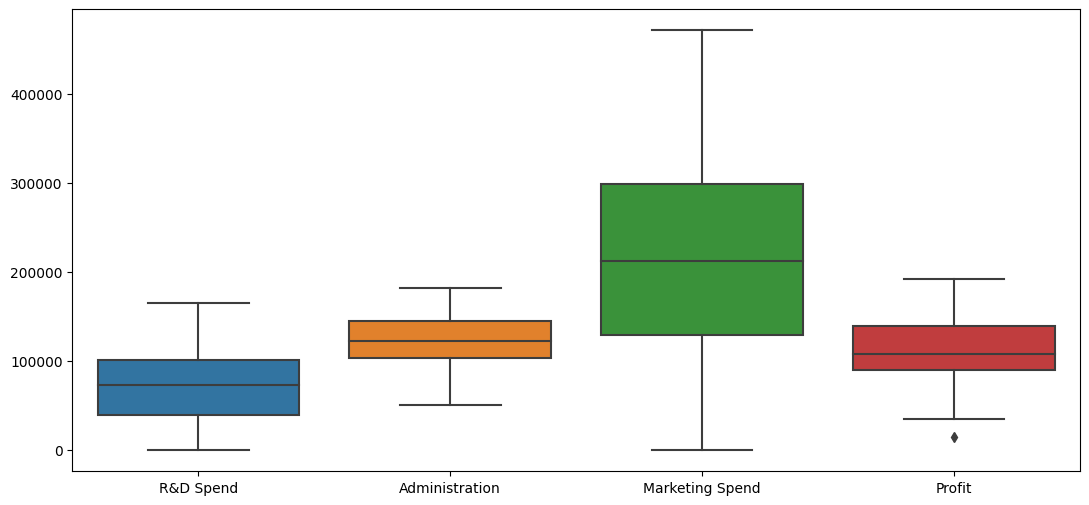

In [12]:
plt.figure(figsize=(13, 6))
sns.boxplot(data=temp)
plt.show()
     

In [13]:
q1=temp["Profit"].quantile(0.25)
q3=temp["Profit"].quantile(0.75)
iqr=q3-q1
     


In [14]:
print(iqr)
     

49627.07499999998


In [15]:
down = q1-1.5*iqr
up = q3+1.5*iqr
print(down, up) 
     

15698.290000000023 214206.58999999997


In [16]:
outliers=[]
Profit = temp["Profit"]

for i in Profit:
  if i > up:
    outliers.append(i)
    print("Up Outlier",i)

  if i < down:
    outliers.append(i)
    print("Down Outlier",i)


Down Outlier 14681.4


In [17]:
temp["Profit"]=temp["Profit"].replace(outliers,temp["Profit"].mean())

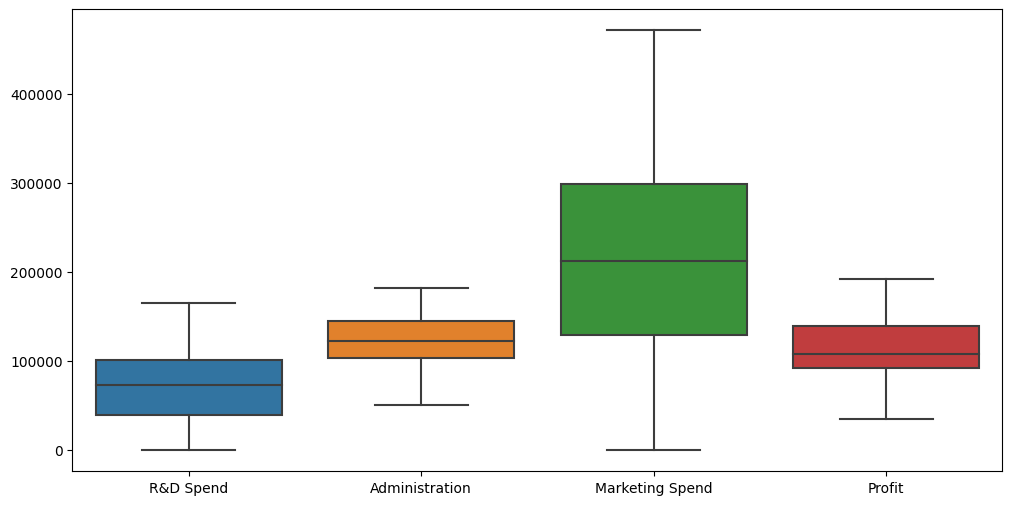

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=temp)
plt.show()
     


In [19]:
X= temp.drop('Profit',axis=1)
Y= temp['Profit']
     

In [20]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [21]:
Y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [22]:
dum = pd.get_dummies(temp['State'])
dum.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [23]:
X=temp.drop('State',axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [24]:
X = pd.concat([X,dum],axis=1)
X.head()
     


,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)
     

In [26]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)
     

LinearRegression()

In [28]:
Y_predict = reg.predict(X_train)
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
MAE = mean_absolute_error(Y_train,Y_predict)
MSE = mean_squared_error(Y_train,Y_predict)
RMSE = np.sqrt(mean_squared_error(Y_train,Y_predict))
R2_SCORE = r2_score(Y_train,Y_predict)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)
print("R2_SCORE :",R2_SCORE)
     

MAE : 3.8149615598691474e-11
MSE : 2.4180501365874453e-21
RMSE : 4.917367320617248e-11
R2_SCORE : 1.0


In [29]:
Y_predict_test = reg.predict(X_test)
MAE = mean_absolute_error(Y_test,Y_predict_test)
MSE = mean_squared_error(Y_test,Y_predict_test)
RMSE = np.sqrt(mean_squared_error(Y_test,Y_predict_test))
R2_SCORE = r2_score(Y_test,Y_predict_test)
print("MAE :",MAE)
print("MSE :",MSE)
print("RMSE :",RMSE)
print("R2_SCORE :",R2_SCORE)

MAE : 3.358134283469273e-11
MSE : 1.661487704229589e-21
RMSE : 4.076135061831967e-11
R2_SCORE : 1.0
